In [1]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model,ensemble,metrics,preprocessing
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

/Users/richardknoche/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/richardknoche/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
df = pd.read_csv('/Users/richardknoche/Desktop/MainImages.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df = df.dropna()
df = df[df['view_rate'] >0 ] #Drop entries with screwy durations

#Creating Evenly sampled Training and Test sets
train = df.sample(frac = 0.6, random_state = 102)
test = df.drop(train.index)
#test = test.sample(frac = 0.5, random_state = 102)
#cv = test.drop(test.index)

In [19]:
#Not using categoricals for now
features = ['price','original_price','age', 'width', 'height',
       'depth', 'Num_Images', 'Duration', 
       'default_angle', 'Thirds_Horizontal_Value_Sym', 'Salient_Hue',
       'Complimentary_Color_Level', 'Thirds_To_Focal_Distance',
       'Vertical_Hue_Sym', 'Laplacian_Sharpness', 'Salient_Value',
       'Thirds_Horizontal_Saliency_Sym', 'Thirds_Value', 'Thirds_Sat',
       'B_Mean', 'V_var', 'Thirds_Saliency', 'g_ygrad', 'Busyness',
       'Horizontal_Saturation_Sym', 'Thirds_Vertical_Saliency_Sym', 'r_ygrad',
       'B_Width', 'g_xgrad', 'G_Mean', 'g_xgrad_std',
       'Thirds_Vertical_Hue_Sym', 'Thirds_Horizontal_Hue_Sym', 'Colorfulness',
       'Vertical_Value_Sym', 'R_xgrad', 'Horizontal_Value_Sym',
       'Salient_Saturation', 'standard_luminance', 'H_var',
       'Thirds_Vertical_Value_Sym', 'Number_of_Contours',
       'Thirds_Vertical_Saturation_Sym', 'R_Width', 'FFT_Sharpness',
       'b_xgrad_std', 'V_mean', 'b_ygrad', 'R_Mean',
       'Thirds_Horizontal_Saturation_Sym', 'b_xgrad', 'H_mean', 'r_ygrad_std',
       'Histogram_Darkness', 'g_ygrad_std', 'Thirds_Hue', 'S_mean', 'S_var',
       'G_Width', 'Lapacian_Saturation', 'percieved_luminace', 'b_ygrad_std',
       'r_xgrad_std', 'Horizontal_Hue_Sym', 'Vertical_Saturation_Sym',
       'Lapacian_Value', 'Lapacian_Hue']

train_x = train[features]
test_x = test[features]

train_y = train['view_rate']
test_y = test['view_rate']

#Normalize features
train_std_scale = preprocessing.StandardScaler().fit(train_x)
train_x_std = train_std_scale.transform(train_x)

train_minmax_scale = preprocessing.MinMaxScaler().fit(train_x)
train_x_minmax = train_minmax_scale.transform(train_x)

test_std_scale = preprocessing.StandardScaler().fit(test_x)
test_x_std = test_std_scale.transform(test_x)

test_minmax_scale = preprocessing.MinMaxScaler().fit(test_x)
test_x_minmax = test_minmax_scale.transform(test_x)

train_x_features = train_x_minmax
test_x_features = test_x_minmax

In [38]:
#Train Model
clf  = linear_model.Ridge()
clf.fit(train_x_features,train_y)
predicted_y = clf.predict(test_x_features)


-0.00258643388648


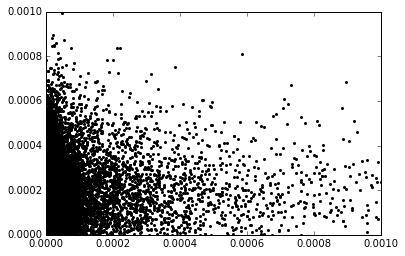

In [39]:
plt.scatter(test_y,predicted_y,s=4,color='k')
plt.xlim([0,0.001])
plt.ylim([0,0.001])
print(metrics.r2_score(test_y,predicted_y))